<a href="https://colab.research.google.com/github/turneyj37/turneyj37/blob/main/CA1_Josh_Turney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis 2021 - Coursework 1 (35%)
***
## Deadline: week 6, 2pm

***

## Instructions

This coursework assesses learning outcomes from **Chapters 1 - 4** of the course.

**These assessments are equivalent to an exam**:
- Submit your work via Turn-It-In on Learning Central. Note that you will need to upload your final notebook exported as a pdf. **Don't forget to execute all of your cells before you export the notebook to pdf**. You can constantly resubmit your turnitin document until the deadline.
- The breakdown of the assessment criteria is provided in Learning Central under Assessment.
- Don't worry about how your code looks - marks are not given for pretty code, but rather for the approach used in solving the problem, your reasoning, explanation and answer.
- Please also take note of the University’s policy on **plagiarism**, which is outlined in your student handbook.

***

## QUESTION 1

A student is taking three modules, and the probability that they pass any individual module depends on the fraction of the weekly live sessions they attend $f$ so that the probability of passing the module is 0.9$f$. 

a.) If the student attends all the weekly live sessions, ($f =1$), calculate the probability that they
will 

    (i) pass all three modules, 
    (ii) fail one module and pass the other two 
    (iii) pass only one module, 
    (iv) pass no modules. 

b.) Show that the sum of these four probabilities is 1.

c.) Calculate the four probabilities on the assumption that the student attends only
half of the weekly live sessions.

d.) What fraction of weekly live sessions must the student attend to have a 50% chance of
passing all three modules? 

e.) Is this a realistic way to model the probability that the student will pass the
modules?

**[10 marks]**

**Answer**:

To begin, we see that this question boils down to a yes or no for each module - indicating a binomial distribution.  The typical form of a binomial distribution look like

$B_{\nu,N} = \frac{N!}{\nu! (N-\nu)!}\theta^{\nu}(1-\theta)^{N-\nu}$.

Here, our $\theta$ value is just 0.9$f$ and N = 3 (the total number of modules), so our distribrution for this particular situation becomes

$B_{\nu,N} = \frac{3!}{\nu!(3-\nu)!}(0.9f)^{\nu}(1-0.9f)^{3-\nu}$.

Using this equation, we can answer parts a - c:

In [ ]:
import numpy as np
from math import factorial as fct
from scipy.stats import binom
### Question 1 ###
# First, lets define our parameters:
N = 3 # The number of modules doesn't change, so N = 3 for the entirety of this
      # problem.
theta_1 = 0.9 # This is our 0.9*f term.

def bino(n, nu, theta):
  return (fct(n)/(fct(nu)*fct(n-nu))) * (theta)**(nu) * (1-theta)**(n-nu)

prob_pass_3 = bino(N,3,0.9)
prob_pass_2 = bino(N,2,0.9)
prob_pass_1 = bino(N,1,0.9)
prob_pass_0 = bino(N,0,0.9)

prob_tot = prob_pass_3 + prob_pass_2 + prob_pass_1 + prob_pass_0
print("""The probability of passing 3 classes after attending every weekly 
lecture is {:.3f}.

""".format(prob_pass_3))
print("""The probability of passing 2 classes after attending every weekly 
lecture is {:.3f}.

""".format(prob_pass_2))
print("""The probability of passing 1 classes after attending every weekly 
lecture is {:.3f}.

""".format(prob_pass_1))
print("""The probability of passing 0 classes after attending every weekly 
lecture is {:.3f}.

""".format(prob_pass_0))
print("""The total probability of passing any number of classes after attending
 every weekly lecture is {:.2f}.
 
 """.format(prob_tot))

# For part c, f becoms 0.5 which means our second theta is 0.45

theta_2 = 0.45

prob_pass_3_c = bino(N,3,0.45)
prob_pass_2_c = bino(N,2,0.45)
prob_pass_1_c = bino(N,1,0.45)
prob_pass_0_c = bino(N,0,0.45)

prob_tot_c = prob_pass_3_c + prob_pass_2_c + prob_pass_1_c + prob_pass_0_c
print("""The probability of passing 3 classes after attending half of the weekly
lectures is {:.3f}.
""".format(prob_pass_3_c))
print("""The probability of passing 2 classes after attending half of the weekly
lectures is {:.3f}.

""".format(prob_pass_2_c))
print("""The probability of passing 1 classes after attending half of the weekly
lectures is {:.3f}.

""".format(prob_pass_1_c))
print("""The probability of passing 0 classes after attending half of the weekly
lectures is {:.3f}.

""".format(prob_pass_0_c))
print("""The total probability of passing any number of classes after attending
 half of the weekly lectures is still {:.2f}.
 
 """.format(prob_tot_c))

The probability of passing 3 classes after attending every weekly 
lecture is 0.729.


The probability of passing 2 classes after attending every weekly 
lecture is 0.243.


The probability of passing 1 classes after attending every weekly 
lecture is 0.027.


The probability of passing 0 classes after attending every weekly 
lecture is 0.001.


The total probability of passing any number of classes after attending
 every weekly lecture is 1.00.
 
 
The probability of passing 3 classes after attending half of the weekly
lectures is 0.091.

The probability of passing 2 classes after attending half of the weekly
lectures is 0.334.


The probability of passing 1 classes after attending half of the weekly
lectures is 0.408.


The probability of passing 0 classes after attending half of the weekly
lectures is 0.166.


The total probability of passing any number of classes after attending
 half of the weekly lectures is still 1.00.
 
 


For part d, we want to know the smallest fraction of the weekly lectures one should attend in order to have a 50% chance of passing EVERY module, we can actually simplify the equation right off the bat! Since our N is 3 AND our $\nu$ is also 3, the only term that servives is the $\theta^{\nu}$ term.  Thus our calculation simplifies to 

$0.50 = \theta^{(3)}$.  Substituting 0.9$f$ for $\theta$ (and performing some simple algebra), we have our ratio of classes to attend at 

$f = \frac{\sqrt[3]{0.5}}{0.9}$.  So let's calculate it!

In [ ]:
### Part D ###
frequency = ((0.5)**(1/3))/(0.9)

print("""The ratio of classes one must attend in order to have a 50% chance of 
passing all modules is {:.2f}.""".format(frequency))

The ratio of classes one must attend in order to have a 50% chance of 
passing all modules is 0.88.


For part E, concerning whether or not this would be a realistic model for passing modules, I don't believe we can simplify the complexities of passing modules down to only one parameter.  There are several factors that come into play, and most of them highly chaotic since students are human beings that lead intricate lives.  If sonder proves anything useful for this question, it's that each and every human being has a life so complex that boiling down any sort of human action to one parameter seems rather farfetched.

***

##  QUESTION 2

A group researching cancer have previously found that the genetic marker D3 is a useful indication that a person will develop the more aggressive form of melanoma skin cancer, in that D3 is present in 65% of the aggressive cases. However the test is expensive.  A rival group claim that the marker M23 is more sensitive than D3, and works out considerably cheaper to test for. The rival research team manage to get DNA samples from 7 patients with the aggressive form of the disease, all of whom test positive for the genetic marker M23. Based on these results, is M23 a better marker for the disease than D3? 

Give full mathematical working for your reasoning, and show labeled plots of the underlying functions.    

**[20 marks]**

To begin, I should make clear that this is a null hypothesis comparison.  Our null hypothesis $H_0$ is that the M23 test is no better than the D3 test.  To check if the data supports our $H_1$ hypothesis - that the M3 test is in fact better - we need to check how porabable the given outcome coming from randomness is.  

If the second company claims that M23 is better than D3 in indicating aggressive cases, we know that M23 should be in *at least* 65% of those cases.  Assuming that the outcome of a test is either, "yes, this person has an aggressive case", or "no, this person does not have an aggressive case", then we wind up with a binomial distribution for the M23 test with a probability value of each success of 65% (in order to check this distribution against the D3 test).  Thus the first relation we need to look at is 

$B_{N,\nu}(M23) = \frac{N!}{\nu! (N-\nu)!} (0.65)^{\nu} (0.65)^{N-\nu}$.

For this distribution, we need to look at the probability of getting 7 successes by pure chance.  That will give us an idea of how likely getting all 7 trials to be successful due to chance really is.  We can compare that probability to our significance level and from there conclude if the data supports our $H_1$ hypothesis:

The probability of having 7 successful M23 tests due to random chance 
(assuming the M23 tests have the same reliability as the D3 test) is 0.049.




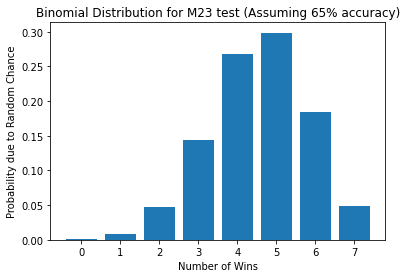

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial as fct
from scipy.stats import binom
%matplotlib inline
### Calculating the probability 
def binomial(totes, wins, probs):
    return (fct(totes)/(fct(wins)*fct(totes - wins)))\
    *((probs)**wins)*(1- probs)**(totes - wins)

#Just a handy binomial distribution function we can use
x = range(0,8)
successrange = range(0,8)
successes = 7
prob_total = 0
while successes <= 7:
  prob_total += binom.pmf(successes,7,0.65)
  successes += 1

plt.bar(x,binom.pmf(successrange,7,0.65))
plt.xlabel("Number of Wins")
plt.ylabel("Probability due to Random Chance")
plt.title("Binomial Distribution for M23 test (Assuming 65% accuracy)")

print ("""The probability of having 7 successful M23 tests due to random chance 
(assuming the M23 tests have the same reliability as the D3 test) is {:.3f}.

""".format(prob_total))

So our probability of obtaining 7 successes out of 7 tests is 4.9%.  Now typically we would have a significance level of 5%, so it may seem that the data supports rejecting our null hypothesis - *at first*.  However, this distribution made the assumption that the M23 test was AS GOOD as the D3, not *better* as was claimed by the company.  Any appreciable difference in the probability of success in the M23 test will skew our distribution further to the right and push our random probability over our threshold of 5%:

The chance of getting 7 successes out of 7 tests assuming a 70% 
success rate is 0.082.




Text(0.5, 1.0, 'Binomial Distribution of M23 Test (Assuming 70% Success Rate)')

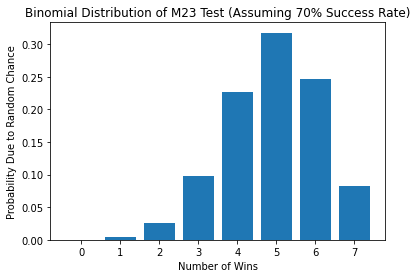

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial as fct
from scipy.stats import binom
%matplotlib inline
### Let's see what happens if we say the M3 test has a 70 percent chance of
### being correct:
y=range(0,8)
yayrange=range(0,8)

print("""The chance of getting 7 successes out of 7 tests assuming a 70% 
success rate is {:.3f}.

""".format(binom.pmf(7,7,0.7)))

plt.bar(y,binom.pmf(yayrange,7,0.7))
plt.xlabel("Number of Wins")
plt.ylabel("Probability Due to Random Chance")
plt.title("Binomial Distribution of M23 Test (Assuming 70% Success Rate)")

As we can see, just a five percent increase in the reliability of the M23 test (which might actually be discernable from the D23 test) caused the probability of obtaining this data purely by chance to nearly double - definitely rising above our significance value of 5%.  This sample simply has too few trials to reliably reject the hypothesis that M23 is no better than D3 as an indicator.  Not to mention the fact that nearly 1 in every 12 experiments will yield this result anyway, an error much too large to be reliable.

## QUESTION 3 

A computer chip manufacturer suspects that roughly half of its latest batch of CPUs contains a flaw.  The accounts department are clearly concerned, and are trying to predict how the fault will affect the number of customers returning products. How many CPUs from the batch would they need to examine to know the probability that any given CPU is faulty to better than 2.5%?

Tip: think carefully about what you are trying to estimate here, you want the *error in your success probability* to be less than 2.5%.

**[15 marks]**

**Answer:**

If we want the error in our success probabllity to be less than 2.5%, we want our margin of error of our sample proportion (call it $\theta$, since it will end up being the probability of a CPU chosen at random to be faulty) to be less than the 2.5% value.  This margin of error depends on two things: the critical value Z (based on the confidence level) and the standard error 

$\sigma = \sqrt{\frac{\theta(1-\theta)}{N}}$, where N is the number of CPU's tested.  So considering we want the product of these two quantities to be less than 2.5%, we come to the conclusion that 
$0.025 = Z\sqrt{\frac{\theta(1-\theta)}{N}}$, which in turn gives us our expression for the number of CPUs tested:

$N = \frac{Z^2\theta(1-\theta)}{0.025^2}$.  All we need to do is find our Z.  $\theta$ in this case can be estimated at around 0.5, since the company believes that around half the CPUs have a fault - and it maximizes our error, giving us the maximum number of CPUs that might need to be tested.  While we don't need to know the maximum value of N - just how many we *ought* to test - this will be a good value for the stopping point if we don't trust the testing right away.

The Z value comes from our confidence interval, typically selected to be around 95%.  This means we need to find our critical value that encompases 95% of the distribution.  For a normal distribution, to include 95% of the values we use a Z = 1.96; this means we want to choose our range of values to be the mean $\pm$ 1.96 times the value of $\sigma$.  Since we now have our critical value and our estimate for $\theta$, all we have to do is substitute them into our expression:

$N = \frac{1.96^2 (0.5)(0.5)}{0.025^2}$.

In [ ]:
number = (1.96**2)*(0.5)*(0.5)*(0.025**(-2))

print("""The number of CPUs the company should test to estimate their error of 
success probability is approximately {:.0f}.

""".format(number))

The number of CPUs the company should test to estimate their error of 
success probability is approximately 1537.




***

## QUESTION 4 

The state of Florida is thinking of relaxing its policy on alcohol sales, to allow supermarkets to sell hard alcohol, since the police predict that this can reduce violence. After some extensive polling, they find that only 33% and 8% of Republican and Independent voters are, respectively, behind the change in the law, while 78% of the Democrat voters are in favour.  You are visiting the state, and ask a Police Officer what she thinks of the idea. She says she’s against the change to the law. What is the probability that she votes Democrat?


You may assume that voting in the Florida polls that year was split in the following way: 40% Democrat and 36% Republican. You can also assume that Independent covers everything that is not Republican or Democrat. 

**[25 marks]**

**Answer:**

To approach this problem, we need to remember Bayes' Theorem.  Bayes' Theorem states:

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$.

For this particular case, we want to know the probability that the police officer is a Democrat (P(D); in this case, being a Democrat implies voting along the lines of the Democratic party - I am more comfortable using this colloquialism as it is the phrase most commonly used in the United States) given that the officer opposes the changing of the law (not in favor, abbreviated NIF) to allow supermarkets to sell hard alcohol.  Thus our quantitative equation becomes:

$P(D|NIF) = \frac{P(NIF|D)P(D)}{P(NIF)}$.

The denominator is pretty easy to calculate.  We just need to sum the products of the probability of not supporting the change given being part of one classification multiplied by the probability of a random person belonging to said classification:

$P(NIF) = P(NIF|R)P(R) + P(NIF|I)P(I) + P(NIF|D)P(D)$

Now we put it all together and find:

$P(D|NIF) = \frac{P(NIF|D)P(D)}{P(NIF|R)P(R)+ P(NIF|I)P(I) + P(NIF|D)P(D)}$

The only thing left is to plug in our numbers:

P(D) = 0.40

P(R) = 0.36

P(I) = 1-(P(D) + P(R)) = 0.24

P(NIF|D) = 0.22

P(NIF|R) = 0.67

and P(NIF|I) = 0.92.

The probability of not being in favor of changing the law given the voting policies of an individual was calculated by subtracting the probability of wanting to change the law (given the political stance) from 1.

In [ ]:
#In case I want to run this cell separately
p_d = 0.40
p_r = 0.36
p_i = 0.24
p_nif_d = 0.22
p_nif_r = 0.67
p_nif_i = 0.92
# These were the values defined at the bottom of the text cell.  Now we can
# define the more complex values

p_nif = p_nif_d * p_d + p_nif_r * p_r + p_nif_i * p_i

p_nif_not_d_2 = ((p_nif_d * p_d))/p_nif
p_nif_not_d_2_percent = p_nif_not_d_2 * 100
# Humans have become acustomed to thinking in percentages

print("""The probability of the police officer being a Democrat given she does
 not support the law changing is {:.3f}, or {:.1f} percent.
 
 """.format(p_nif_not_d_2,p_nif_not_d_2_percent))

The probability of the police officer being a Democrat given she does
 not support the law changing is 0.160, or 16.0 percent.
 
 


***

## QUESTION 5

Ten new recruits for a basketball team are timed (in secs) in running the 100 meters and 1,500m races to determine how fast they can run. The following results were obtained,

| Distance | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |9 | 10 |  
| --- | --- | --- | --- | --- | --- | --- | --- | --- |--- |--- |
| 100m: | 12 | 11 | 13 | 14 |12 | 15 |12 | 16 |10 | 11 |
| 1500m: | 280 | 290 |220 | 260 |270 | 240 |250 | 230 | 280 | 260 |

What trends do we see in the data above? Are they significant? Use appropriate tests to answer this question.

Please **create your own** statistical functions when answering this question. Please include any sources you have used to answer this question.  

**[30 marks]**

**Answer:**

First things first, we can plot this data to see if we have any sort of visible correlation just to get an idea of what we're working with for this data:

Text(0.5, 1.0, '100 Meter Time versus 1500 Meter Time')

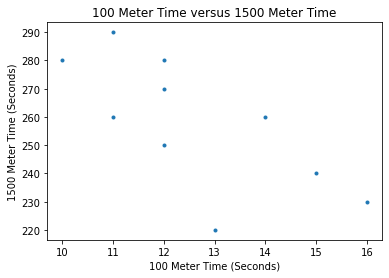

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
### Basic Plot ###
t_100 = np.array([12,11,13,14,12,15,12,16,10,11])
t_1500 = np.array([280,290,220,260,270,240,250,230,280,260])
plt.scatter(t_100, t_1500, marker = ".")
plt.xlabel('100 Meter Time (Seconds)')
plt.ylabel('1500 Meter Time (Seconds)')
plt.title('100 Meter Time versus 1500 Meter Time')

Just by looking at this, we see a negative correlation in the data, implying that athletes who specialize in sprints do not do as well in long distance races.  As a former track and field coach, I can confirm this is true.  But how true is it, you ask?  Good question! There are tests we can use to see how correlated this data is, particularly the Pearson R test.  

The Pearson R test uses three values when being computed: the standard deviations of the two sets of data bewtween which we want to see if there's a correlation and the covariance of the same sets.  In the language of math, we have

$r_{Pearson} = \frac{\sigma_{x,y}}{\sigma_x \sigma_y}$, where x and y are the sets of data mentioned above, the numerator is the covariance term, and the denominator is the product of the standard deviations.  These quantities are pretty easy to compute:

$\sigma_x = \sqrt{\frac{1}{N-1} \Sigma(x-\hat{x})^2}$, and $\sigma_{x,y} = \frac{1}{N-1} \Sigma(x-\hat{x})(y-\hat{y})$.  Here, $\hat{x}$ and $\hat{y}$ denote the means of x and y respectively.  Note that instead of using $\frac{1}{N}$ for these expressions, we have to alot for the loss of degrees of freedom throughout the computations.  Both $\hat{x}$ and $\hat{y}$ take up one degree of freedom, leaving N-1 degrees for the covariance.  

Now that we have established our quantities that we need, we simply have to calculate them:

In [ ]:
import numpy as np
import math
### Numbers Time ###
t_100_tot = 0
t_1500_tot = 0
for i in range(0,len(t_100)):
  t_100_tot += t_100[i]
  t_1500_tot += t_1500[i]
  
t_100_mean = t_100_tot/len(t_100)
t_1500_mean = t_1500_tot/len(t_1500)
print(t_100_mean)
print(t_1500_mean)

sigma_100 = (1/(len(t_100)-1))*(np.sum((t_100 - t_100_mean)**2))**(1/2)
sigma_1500 = (1/(len(t_100)-1))*(np.sum((t_1500 - t_1500_mean)**2))**(1/2)
covariance = (1/(len(t_100)-1))*(np.sum((t_100-t_100_mean)\
                                 *(t_1500 - t_1500_mean)))

print(sigma_100)
print(sigma_1500)
print(covariance)
#pearson_r=(covariance/((sigma_100 * sigma_1500)**(1/2)))
#print(pearson_r)

# If you have any advice on why the above calculation didn't work, please
# let me know.  I kept getting a Pearson R value that had magnitude much 
# larger than 1, and it seemed no matter what I did the code would not
# cooperate and varied wildly.  I ended up using brute force in lieu of trying
# to build each component separately which happened to work, but will be 
# horrendously complicated for anything more complex.

pearson_r_1 = ((np.sum((t_100 - t_100_mean)*(t_1500-t_1500_mean)))/\
((np.sum((t_100-t_100_mean)**2)*np.sum((t_1500 - t_1500_mean)**2))**(1/2)))

print("The Pearson R correlation for this set of data is {:.2f}."\
      .format(pearson_r_1))

12.6
258.0
0.6324555320336759
7.665861471404595
-30.888888888888882
The Pearson R correlation for this set of data is -0.71.


With a Pearson R value of -0.71, we have a rather strong negative correlation between sprint times and long distance times.  This means that we have strong evidence to suggest that sprinters and long distance runners are not able to be interchanged.  If an athlete is competitive at one type of race, typically they will be farther behind in the other.  In practice, this is evident as these two groups of runners are built differently, work on different running techniques, and have different levels of conditioning - leading to the negative correlation seen in the Pearson R test. Of course there may be outliers - for example, the athlete who ran a 13-second 100 meter race and a 220-second 1500 meter race - but we can look back and see how our correlation might change if we omit this one point that may be an outlier: 

In [ ]:
# We can make a second set of data omitting the "outlier":
import numpy as np
import math
t_100_2 = np.array([12,11,14,12,15,12,16,10,11])
t_1500_2 = np.array([280,290,260,270,240,250,230,280,260])
# These are the same arrays as before sans the point (13, 220);
# Since the process is the same, we can use the same code and simply change the 
# names of the variables to call into these expressions:
t_100_2_tot = 0
t_1500_2_tot = 0
for i in range(0,len(t_100_2)):
  t_100_2_tot += t_100_2[i]
  t_1500_2_tot += t_1500_2[i]
  
t_100_2_mean = t_100_2_tot/len(t_100_2)
t_1500_2_mean = t_1500_2_tot/len(t_1500_2)
print(t_100_2_mean)
print(t_1500_2_mean)

sigma_100_2 = (1/(len(t_100_2)-1))*(np.sum((t_100_2 - t_100_2_mean)**2))**(1/2)
sigma_1500_2 =(1/(len(t_1500_2)-1))*(np.sum((t_1500_2-t_1500_2_mean)**2))**(1/2)
covariance_2 = (1/(len(t_100_2)-1))*(np.sum((t_100_2-t_100_2_mean)\
                                 *(t_1500_2 - t_1500_2_mean)))

print(sigma_100_2)
print(sigma_1500_2)
print(covariance_2)

pearson_r_2 = ((np.sum((t_100_2 - t_100_2_mean)*(t_1500_2-t_1500_2_mean)))/\
((np.sum((t_100_2-t_100_2_mean)**2)\
*np.sum((t_1500_2 - t_1500_2_mean)**2))**(1/2)))

print("The Pearson R correlation for this set of data is {:.2f}."\
      .format(pearson_r_2))

# Because this athelete's time is so low, I want to know what percentile he
# would rank if this sample distribution was acturately representative of the 
# entire population: 
z_value_220_1500 = (t_1500_mean - 220)/sigma_1500
print("""The critical value of the 220-second 
      1500 meter runner is approximately {:.3f}.

""".format(z_value_220_1500))

12.555555555555555
262.22222222222223
0.7095577652469334
7.021791477646966
-32.638888888888886
The Pearson R correlation for this set of data is -0.82.
The critical value of the 220-second 
      1500 meter runner is approximately 4.957.




Overall, that one data point caused a change of roughly one to ten percent across the expressions, possibly implying that it was an outlier.  However, without that one point, the correlation becomes *even stronger* than before, suggesting even more that there is a negative correlation between the two skill sets.  Every now and again there is a freak athlete that is competitive in all assets of a sport.  We call them Olympians and they can definitely throw a screw into the gears of statistics.  

In the case of this runner, their 100 time isn't really noteworthy, clocking in within one standard deviation from the average 12.6 seconds.  However, the 220-second 1500 meter time is unbelievably fast, and is almost 4.957 standard deviations faster than the mean!  Using the table on ztable.net, a -4 value for Z implies that the data point lies within the fastest 0.003% of runners!  Now this seems at first like a world-class distance runner, but with only 10 participants and the fact that these athletes are on a basketball team, this doesn't necessarily imply that this runner could be successful on a track.  We have too few statistics to imply that this distribution is a realistic model for the world, and we have far too few statistics on the runner to imply that this time wasn't simply a fluke.  That being said, I would keep an eye on this athlete and watch his career if he ever decides to compete in track and field events and train for long distance races.